In [126]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [127]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [128]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [129]:
log = lammps_logfile.File("pull.log")
timestep = 1 # fs
time_0 = log.get("Step", run_num=0)*timestep/1000 # ps
rgyr_0 = log.get("c_rgyr", run_num=0)
time_1 = log.get("Step", run_num=1)*timestep/1000 # ps
rgyr_1 = log.get("c_rgyr", run_num=1)

In [130]:
f = open("pull.dat", "r")
data = []
t = 0
for l in f:
    if len(l.split(" ")) == 4:
        try:
            n = np.int32(l.split(" ")[0])
            if n == 1:
                t += 1
            v = np.float32(l.split(" ")[1])
            b = np.int32(l.split(" ")[2])
            if b==1: # C-C-OE-C # b == 2: # O-C-C-O
                data.append([t, v])
        except:
            pass
f.close()
data = np.array(data)

all_n = np.int32(data[:,0])
before = []
after = []
for n in range(1,t):
    x = data[all_n == n][:,1]
    a, b = np.histogram(x, range=(0, 180), bins=50)
    b = (b[1:]+b[:-1])/2
    if n < 300:
        before.append(a)
    elif n > 340:
        after.append(a)
histogram_before = np.mean(before, axis=0)
histogram_after = np.mean(after, axis=0)

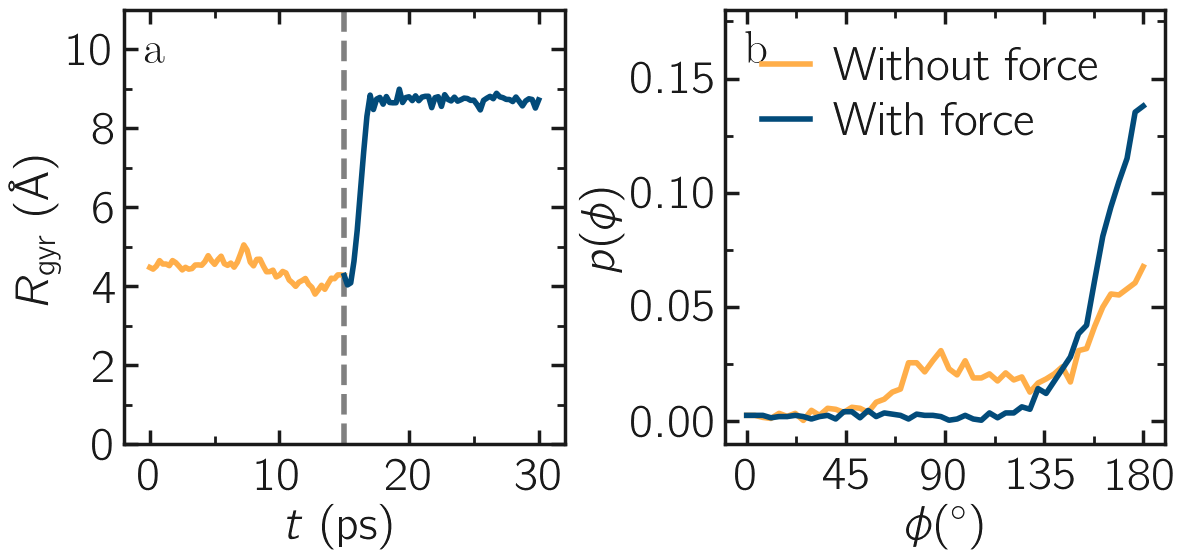

In [145]:
filename = "PEG-distance"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.7), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
x = np.linspace(0, 11)
myplt.add_plot(x = x*0+15, y = x, type = "plot", linewidth_data = 1.5,
               marker = "--", data_color = color4, markersize = 12)
myplt.add_plot(x = time_0-25, y = rgyr_0, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
myplt.add_plot(x = time_1-25, y = rgyr_1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(xlabel = r'$t ~ \mathrm{(ps)}$',
                     ylabel = r'$R_\mathrm{gyr}~\mathrm{(\AA{})}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 32, 10), y_ticks=np.arange(0, 11, 2),
                    x_boundaries=(-2, 32), y_boundaries=(0, 11))

# Panel b
myplt.add_panel()
myplt.add_plot(x = np.linspace(0, 180, 50), y = histogram_before/np.sum(histogram_before), type = "plot",
               linewidth_data = 3, marker = "-", data_color = color1, markersize = 12, data_label=r"$\mathrm{Without~force}$")
myplt.add_plot(x = np.linspace(0, 180, 50), y = histogram_after/np.sum(histogram_after), type = "plot",
               linewidth_data = 3, marker = "-", data_color = color2, markersize = 12, data_label=r"$\mathrm{With~force}$")
myplt.complete_panel(xlabel = r'$\phi (^\circ)$',
                     ylabel = r'$p (\phi)$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 185, 45), y_ticks=np.arange(0, 0.17, 0.05),
                    x_boundaries=(-10, 190), y_boundaries=(-0.01, 0.18))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)